<a href="https://colab.research.google.com/github/momoenomoto/ML-final-project/blob/main/Data_Analysis_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/all_data_no_duplicates_equal_size.csv")

In [ ]:
data.head(10)

,song_id,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
0,17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,blues
1,80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,blues
2,fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,blues
3,8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,blues
4,6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,blues
5,427f1bf0d0b14f5dcd3edbb3561e24493b8e338d,-136.25974,172.59949,-38.454110,51.471230,-9.210611,23.187613,-2.800377,9.361017,-1.316823,...,1.421514,1.143405,139.674831,1.663935,4.127868,0.467440,0.326743,14.549489,8.532701,blues
6,be043e8f0faaea0d4cfa36b14172b6b30a57c398,-186.63614,175.44250,-38.024853,33.556710,10.110077,12.562787,9.992175,7.003207,16.348728,...,1.434051,1.844193,109.956782,1.622965,2.501570,0.238919,-0.085705,14.816340,8.183992,blues
7,1c09c4a26866ef28e507aa280cd51a719b035ea6,-151.80618,175.59180,-25.405882,32.177900,5.982085,24.986546,-1.543303,9.279480,4.102045,...,1.474009,1.294586,126.048018,1.425889,2.202716,0.897709,0.864059,14.473772,8.554240,blues
8,13655dd5eb8caad647021ca74417f71db23b7780,-105.62864,198.75179,-61.418823,29.890055,2.061370,6.838061,-3.562858,1.008359,4.786649,...,1.468327,1.506442,117.453835,1.209135,1.543631,-0.525107,0.437820,14.434257,8.462482,blues
9,4cfb55a2ddbd24a5538f21588a85fa5727025aa7,-244.07864,176.26709,-59.649230,23.343456,-6.413820,11.967070,-11.608889,-1.186092,3.141831,...,1.540191,1.977420,117.453835,1.481484,2.041936,-0.350467,-0.632589,14.507312,8.356724,blues


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_id         880 non-null    object 
 1   mfcc_a_0        880 non-null    float64
 2   mfcc_a_1        880 non-null    float64
 3   mfcc_a_2        880 non-null    float64
 4   mfcc_a_3        880 non-null    float64
 5   mfcc_a_4        880 non-null    float64
 6   mfcc_a_5        880 non-null    float64
 7   mfcc_a_6        880 non-null    float64
 8   mfcc_a_7        880 non-null    float64
 9   mfcc_a_8        880 non-null    float64
 10  mfcc_a_9        880 non-null    float64
 11  mfcc_a_10       880 non-null    float64
 12  mfcc_a_11       880 non-null    float64
 13  mfcc_a_12       880 non-null    float64
 14  mfcc_std_0      880 non-null    float64
 15  mfcc_std_1      880 non-null    float64
 16  mfcc_std_2      880 non-null    float64
 17  mfcc_std_3      880 non-null    flo

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["genre"] = le.fit_transform(data["genre"])
data.head()

,song_id,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
0,17bf8d5f74d4e53a3f918263da27600ba0e555b5,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,...,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608,0
1,80822cc306bcf4d6ce727ed9b185382183590feb,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,...,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646,0
2,fe86aae90064f43dd3c9ccc2271fd3570ea8d530,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,...,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551,0
3,8a36fef7cc58e415b09f472062d529ad75f6888a,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,...,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730,0
4,6a90012a2f47eb44abcaf1641683f86425713e40,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,...,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227,0


In [5]:
X = data.iloc[:,1:80]

In [6]:
y = data.iloc[:,80]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split：int or float, default=2
The minimum number of samples required to split an internal node

min_samples_leafint or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

min_weight_fraction_leaffloat, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

random_stateint, RandomState instance or None, default=None
Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

max_leaf_nodesint, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decreasefloat, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

class_weightdict, list of dict or “balanced”, default=None
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

Decision Tree Classifier (Hyperparameter Tuning)

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
params_dtc = {'max_depth':[6,7,8,9,10],
        'min_samples_leaf':[1,2,3,4,5],
        'ccp_alpha' : [0.001,0.005,0.01,0.05,0.1]}
grid_dtc = GridSearchCV(estimator = dtc,
             param_grid = params_dtc,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [ ]:
best_model = grid_dtc.best_estimator_
best_param = grid_dtc.best_params_
print("best paramers for decision tree: ", best_param)
print("best accuracy score for decision tree is: {:.3f}".format(grid_dtc.best_score_))

y_pred = best_model.predict(X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for decision tree: {:.3f}'.format(test_accu))

best paramers:  {'ccp_alpha': 0.01, 'max_depth': 8, 'min_samples_leaf': 1}
best accuracy score is: 0.557
Test set accuracy score: 0.543


based on the result, I don't think there is an overfitting problem. But I still used bagging/boosting to see if the accuracy will improve.

Decision Tree Classifier: Bagging Applied

In [13]:
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
def bagging_dtc(num_trees):
  dtc = DecisionTreeClassifier(min_samples_leaf=1, max_depth=8, ccp_alpha=0.01)
  # Instantiate bc
  dtc_bagging = BaggingClassifier(estimator=dtc,
                  n_estimators=num_trees,
                  oob_score=True,
                  random_state=1)
  dtc_bagging.fit(X_train, y_train)
  y_pred = dtc_bagging.predict(X_test)
  acc_test = accuracy_score(y_pred, y_test)
  acc_oob = dtc_bagging.oob_score_
  return acc_test, acc_oob
l = [50,100,150,200,250,300]
for num in l:
  acc_test, acc_oob = bagging_dtc(num)
  print("Number of Trees = ",num, ": ", 'Test set accuracy for Decision Tree Classifier (Bagging): {:.3f}, OOB accuracy for Decision Tree Classifier (Bagging): {:.3f}'.format(acc_test, acc_oob))

Number of Trees =  50 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.591, OOB accuracy for Decision Tree Classifier (Bagging): 0.620
Number of Trees =  100 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.591, OOB accuracy for Decision Tree Classifier (Bagging): 0.626
Number of Trees =  150 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.591, OOB accuracy for Decision Tree Classifier (Bagging): 0.623
Number of Trees =  200 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.598, OOB accuracy for Decision Tree Classifier (Bagging): 0.616
Number of Trees =  250 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.601, OOB accuracy for Decision Tree Classifier (Bagging): 0.616
Number of Trees =  300 :  Test set accuracy for Decision Tree Classifier (Bagging): 0.598, OOB accuracy for Decision Tree Classifier (Bagging): 0.615


Decision Tree Classifier: Boosting Applied

Adaboost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
def adaboost_dtc(num_trees):
  dtc = DecisionTreeClassifier(min_samples_leaf=1, max_depth=8, ccp_alpha=0.01)  #using the parameters derived from the pure decision tree classifier

  # Instantiate ada
  dtc_ada = AdaBoostClassifier(estimator=dtc, n_estimators=100, random_state=1)  #tune n_estimators from 150 to 200 increases the accuracy
  dtc_ada.fit(X_train, y_train)
  train_accu = dtc_ada.score(X_train, y_train)

  y_pred = dtc_ada.predict(X_test)
  test_accu = accuracy_score(y_pred,y_test)
  return train_accu, test_accu

for num in l:
  train_accu, test_accu = adaboost_dtc(num)
  print('Number of Trees = ', num, ': ', 'Train set accuracy for Decision Tree Classifier (Adaboost): {:.3f}, Test set accuracy: {:.3f}'.format(train_accu, test_accu))

Number of Trees =  50 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.138, Test set accuracy: 0.100
Number of Trees =  100 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.138, Test set accuracy: 0.100
Number of Trees =  150 :  Train set accuracy for Decision Tree Classifier (Adaboost): 0.138, Test set accuracy: 0.100


KeyboardInterrupt: ignored

Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate gb
gb = GradientBoostingClassifier(learning_rate = 0.1)

# Apply GridSearchCV
params_gb = {'learning_rate': [0.01,0.05,0.1,0.15],
        'n_estimators':[50,100,150,200],
        'max_depth': [4,6,8,10]}  #from 0.01,0.05,0.1, learning rate = 0.1 yields a best result
grid_gb = GridSearchCV(estimator = gb,
             param_grid = params_gb,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [18]:
best_model = grid_gb.best_estimator_
best_param = grid_gb.best_params_
print("best paramers of decision tree (gradient boosting): ", best_param)
print("best accuracy score for decision tree (gradient boosting) is: {:.3f}".format(grid_gb.best_score_))

y_pred = best_model.predict(X_test)
test_accu = accuracy_score(y_test, y_pred)
print('Test set accuracy score for decision tree (gradient boosting): {:.3f}'.format(test_accu))

best paramers of decision tree (gradient boosting):  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100}
best accuracy score for decision tree (gradient boosting) is: 0.686
Test set accuracy score for decision tree (gradient boosting): 0.656


Random Forest

In [ ]:
rf = RandomForestClassifier(criterion = "gini",max_features = "sqrt")
params_rf = {'n_estimators': [25,50,100,150,200],
        'max_depth':[6,7,8,9,10],
        'min_samples_leaf':[1,2,3,4,5]}
grid_rf = GridSearchCV(estimator = rf,
             param_grid = params_rf,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
best_model = grid_rf.best_estimator_
best_param = grid_rf.best_params_
print("best paramers of random forest: ", best_param)
print("best accuracy score of random forest is: {:.3f}".format(grid_rf.best_score_))

y_pred = best_model.predict(X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for random forest: {:.3f}'.format(test_accu))

best paramers of random forest:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
best accuracy score of random forest is: 0.686
Test set accuracy score for random forest: 0.646


Fine tune hyperparameters again

In [22]:
rf2 = RandomForestClassifier(criterion = "gini", max_features = "sqrt")
params_rf2 = {'min_samples_leaf':[1,2,3,4,5],
        'n_estimators': [200,250,300],
        'max_depth':[10,15,20]}
grid_rf2 = GridSearchCV(estimator = rf2,
             param_grid = params_rf2,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_rf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy')

In [27]:
best_model = grid_rf2.best_estimator_
best_param = grid_rf2.best_params_
print("best paramers of random forest(2): ", best_param)
print("best accuracy score of random forest(2) is: {:.3f}".format(grid_rf2.best_score_))

y_pred = best_model.predict(X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for random forest(2): {:.3f}'.format(test_accu))

best paramers of random forest(2):  {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 250}
best accuracy score of random forest(2) is: 0.693
Test set accuracy score for random forest(2): 0.653


Compare the first and second random forest, the second one performs slightly better.

In [10]:
rf_best = RandomForestClassifier(n_estimators=250, min_samples_leaf=1, max_depth=15, criterion="gini", max_features="sqrt")
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
test_accu = accuracy_score(y_test, y_pred)
print('Test set accuracy score for best random forest: {:.3f}'.format(test_accu))

Test set accuracy score for best random forest: 0.625


In [54]:
rf_best.feature_importances_

array([0.03005905, 0.00805723, 0.02416692, 0.0086005 , 0.01048884,
       0.00757297, 0.01126474, 0.00984952, 0.00778423, 0.00846007,
       0.00865278, 0.00866965, 0.00825193, 0.00771573, 0.00626805,
       0.00931113, 0.00697173, 0.00968538, 0.01053263, 0.00675893,
       0.00839855, 0.00855889, 0.00828127, 0.0099905 , 0.01115984,
       0.01958705, 0.00675444, 0.00706662, 0.00642215, 0.0061774 ,
       0.0081611 , 0.00771982, 0.00864217, 0.00859027, 0.00728511,
       0.00625051, 0.00559036, 0.00577695, 0.00741583, 0.00717607,
       0.00744925, 0.00612767, 0.00999457, 0.00722454, 0.00681837,
       0.00803545, 0.00751083, 0.00662596, 0.00615786, 0.00699625,
       0.02278839, 0.0228292 , 0.02460229, 0.03178308, 0.03620207,
       0.04350354, 0.02258973, 0.0326096 , 0.01992695, 0.02835114,
       0.02007869, 0.01016595, 0.01272916, 0.01784252, 0.02256713,
       0.01179573, 0.00594767, 0.014344  , 0.02397676, 0.01803006,
       0.03544687, 0.02206044, 0.00998585, 0.00754911, 0.00701

In [11]:
feature_scores = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
display(feature_scores)

rmseP_std       0.041453
rmseP_a         0.038330
onset_a         0.035015
rmseH_std       0.031847
melspect_std    0.031782
                  ...   
mfcc_std_6      0.006218
chroma_a_11     0.006032
beats_a         0.005771
chroma_a_10     0.005565
tonnetz_a       0.005441
Length: 79, dtype: float64

In [33]:
type(feature_scores)

pandas.core.series.Series

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

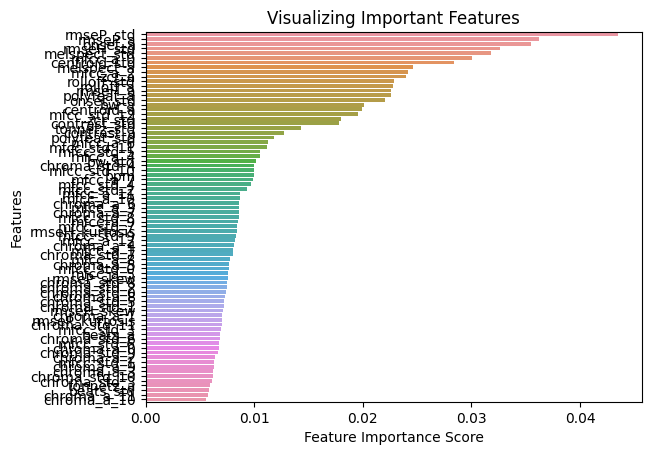

In [35]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

Drop features based on feature importance (delete features with importance < 0.005)

In [51]:
X.head()

,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,mfcc_a_9,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
0,-131.34530,154.44778,-46.625813,55.491830,-2.969374,28.455832,-11.929317,9.539672,4.456010,9.052435,...,0.019586,1.541892,1.521225,132.512019,1.070878,1.396955,0.741772,1.111939,14.542479,8.524608
1,-216.48515,159.88239,-53.843456,41.647510,4.802261,6.194261,-0.619864,1.253317,5.258920,9.118914,...,0.022674,1.589639,1.765213,117.453835,1.569087,2.719492,0.010281,-0.229946,14.460827,8.436646
2,-97.64007,137.78816,-43.407673,57.867115,-17.740084,48.168274,-20.405445,14.013074,-11.915717,13.601735,...,0.021188,1.332900,0.778537,123.046875,1.270062,1.725401,0.076682,-0.120848,14.568310,8.531551
3,-218.33733,139.85650,-46.182710,29.928583,-5.652246,26.629574,-6.704617,15.074043,0.800906,0.926584,...,0.025217,1.527841,1.310864,132.512019,1.251199,1.432018,1.522334,2.031958,14.527072,8.542730
4,-137.82199,145.93646,-52.225964,44.550194,-5.257767,24.834461,-7.554444,12.882658,4.022466,11.714938,...,0.031764,1.525155,1.458287,89.102909,2.108472,5.425519,0.541542,1.362728,14.487932,8.556227


In [ ]:
print(feature_scores[feature_scores<0.005])

chroma_std_3    0.004975
chroma_a_9      0.004946
chroma_a_10     0.004900
chroma_a_11     0.004641
tonnetz_a       0.004323
dtype: float64


In [48]:
feature_drop1 = ["chroma_a_9","chroma_a_10","chroma_a_11","tonnetz_a"]
X_drop1 = X.drop(feature_drop1, axis=1)
X_train_drop1, X_test_drop1, y_train, y_test = train_test_split(X_drop1, y, test_size=0.33, random_state=42)
rf_best_drop1 = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_depth=10, criterion="gini", max_features="sqrt")
rf_best_drop1.fit(X_train_drop1, y_train)
y_pred_drop1 = rf_best_drop1.predict(X_test_drop1)
test_accu = accuracy_score(y_test, y_pred_drop1)
print('Test set accuracy score for best random forest (dropped features < 0.005): {:.3f}'.format(test_accu))

Test set accuracy score for best random forest (dropped features < 0.005): 0.625


Drop features based on feature importance (delete features with importance < 0.0055)

In [ ]:
print(feature_scores[feature_scores<0.0055])

chroma_a_2      0.005486
chroma_a_3      0.005453
mfcc_std_6      0.005442
chroma_a_0      0.005414
chroma_std_7    0.005386
beats_a         0.005253
mfcc_std_3      0.005150
beats_std       0.005095
chroma_a_11     0.005016
chroma_a_1      0.004936
chroma_std_9    0.004828
chroma_std_3    0.004754
chroma_a_10     0.004407
tonnetz_a       0.004293
dtype: float64


In [50]:
feature_drop2 = ["mfcc_std_1","chroma_a_2","chroma_std_9","beats_a","mfcc_std_3","chroma_std_3","chroma_a_9","chroma_a_10","chroma_a_11","tonnetz_a"]
X_drop2 = X.drop(feature_drop2, axis=1)
X_train_drop2, X_test_drop2, y_train, y_test = train_test_split(X_drop2, y, test_size=0.33, random_state=42)
rf_best_drop2 = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_depth=10, criterion="gini", max_features="sqrt")
rf_best_drop2.fit(X_train_drop2, y_train)
y_pred_drop2 = rf_best_drop2.predict(X_test_drop2)
test_accu = accuracy_score(y_test, y_pred_drop2)
print('Test set accuracy score for best random forest (dropped features < 0.0055): {:.3f}'.format(test_accu))

Test set accuracy score for best random forest (dropped features < 0.0055): 0.646


In [59]:
test_accu_lst = []
for threshold in np.arange(0.0045, 0.01, 0.0005):
  drop_features = feature_scores[feature_scores<threshold].index.tolist()
  X_drop = X.drop(drop_features, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.33)
  rf_best_drop = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, max_depth=15, criterion="gini", max_features="sqrt")
  rf_best_drop.fit(X_train_drop, y_train)
  y_pred_drop = rf_best_drop.predict(X_test_drop)
  train_accu = rf_best_drop.score(X_train_drop, y_train)
  test_accu = accuracy_score(y_test, y_pred_drop)
  test_accu_lst.append(test_accu)
  print("When threshold is: {:.4f}, the training accuracy is: {:.4f}, the testing accuracy is: {:.3f}".format(threshold, train_accu, test_accu))

When threshold is: 0.0045, the training accuracy is: 1.0000, the testing accuracy is: 0.639
When threshold is: 0.0050, the training accuracy is: 1.0000, the testing accuracy is: 0.684
When threshold is: 0.0055, the training accuracy is: 1.0000, the testing accuracy is: 0.646
When threshold is: 0.0060, the training accuracy is: 1.0000, the testing accuracy is: 0.660
When threshold is: 0.0065, the training accuracy is: 1.0000, the testing accuracy is: 0.708
When threshold is: 0.0070, the training accuracy is: 1.0000, the testing accuracy is: 0.670
When threshold is: 0.0075, the training accuracy is: 1.0000, the testing accuracy is: 0.691
When threshold is: 0.0080, the training accuracy is: 1.0000, the testing accuracy is: 0.722
When threshold is: 0.0085, the training accuracy is: 0.9966, the testing accuracy is: 0.698
When threshold is: 0.0090, the training accuracy is: 0.9983, the testing accuracy is: 0.701
When threshold is: 0.0095, the training accuracy is: 0.9966, the testing accurac

Overfitting problem exists, tune hyperparameters

In [12]:
train_accu_lst = []
test_accu_lst = []
for threshold in np.arange(0.0045, 0.025, 0.0005):
  drop_features = feature_scores[feature_scores<threshold].index.tolist()
  X_drop = X.drop(drop_features, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.33)
  rf_best_drop = RandomForestClassifier(n_estimators=35, min_samples_leaf=2, max_depth=4, criterion="gini", max_features="sqrt")
  rf_best_drop.fit(X_train_drop, y_train)
  y_pred_drop = rf_best_drop.predict(X_test_drop)
  train_accu = rf_best_drop.score(X_train_drop, y_train)
  test_accu = accuracy_score(y_test, y_pred_drop)
  train_accu_lst.append(train_accu)
  test_accu_lst.append(test_accu)
  print("When threshold is: {:.4f}, the training accuracy is: {:.4f}, the testing accuracy is: {:.3f}".format(threshold, train_accu, test_accu))

When threshold is: 0.0045, the training accuracy is: 0.7097, the testing accuracy is: 0.660
When threshold is: 0.0050, the training accuracy is: 0.7029, the testing accuracy is: 0.646
When threshold is: 0.0055, the training accuracy is: 0.7487, the testing accuracy is: 0.605
When threshold is: 0.0060, the training accuracy is: 0.7165, the testing accuracy is: 0.625
When threshold is: 0.0065, the training accuracy is: 0.7216, the testing accuracy is: 0.639
When threshold is: 0.0070, the training accuracy is: 0.7148, the testing accuracy is: 0.560
When threshold is: 0.0075, the training accuracy is: 0.6978, the testing accuracy is: 0.605
When threshold is: 0.0080, the training accuracy is: 0.7436, the testing accuracy is: 0.581
When threshold is: 0.0085, the training accuracy is: 0.7114, the testing accuracy is: 0.536
When threshold is: 0.0090, the training accuracy is: 0.6961, the testing accuracy is: 0.550
When threshold is: 0.0095, the training accuracy is: 0.7131, the testing accurac

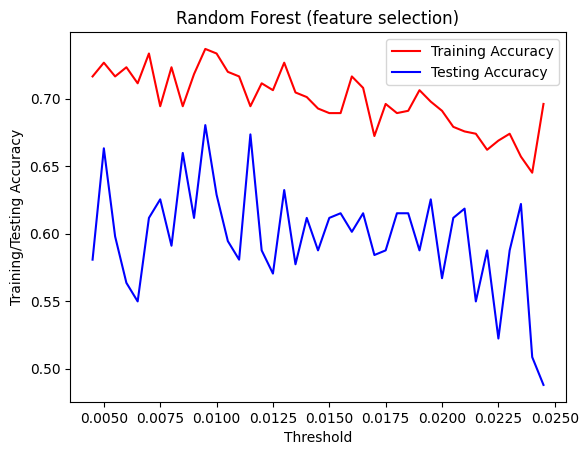

In [90]:
threshold_lst = [i for i in np.arange(0.0045, 0.025, 0.0005)]
plt.plot(threshold_lst, train_accu_lst, c="red", label="Training Accuracy")
plt.plot(threshold_lst,test_accu_lst, c="blue", label="Testing Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Training/Testing Accuracy')
plt.title("Random Forest (feature selection)")
plt.legend()
plt.show()

Best result: When threshold is: 0.0115, the training accuracy is: 0.6944, the testing accuracy is: 0.674

### shrinking feature set by feature correlations (only linear correlation will be ocnsidered?)

In [91]:
cor_matrix = X.corr().abs()
print(cor_matrix)

                mfcc_a_0  mfcc_a_1  mfcc_a_2  mfcc_a_3  mfcc_a_4  mfcc_a_5  \
mfcc_a_0        1.000000  0.301693  0.741316  0.507841  0.554797  0.583541   
mfcc_a_1        0.301693  1.000000  0.074123  0.577294  0.365530  0.582495   
mfcc_a_2        0.741316  0.074123  1.000000  0.274318  0.427161  0.290460   
mfcc_a_3        0.507841  0.577294  0.274318  1.000000  0.227992  0.608129   
mfcc_a_4        0.554797  0.365530  0.427161  0.227992  1.000000  0.398366   
...                  ...       ...       ...       ...       ...       ...   
rmseP_kurtosis  0.318926  0.036660  0.339671  0.104094  0.200549  0.205093   
rmseH_skew      0.271259  0.118550  0.221585  0.177680  0.120479  0.246612   
rmseH_kurtosis  0.090077  0.068594  0.060525  0.092555  0.042275  0.147324   
beats_a         0.012792  0.006661  0.023089  0.055329  0.021214  0.017915   
beats_std       0.107370  0.009767  0.162251  0.107416  0.071750  0.069782   

                mfcc_a_6  mfcc_a_7  mfcc_a_8  mfcc_a_9  ...   z

In [92]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

                mfcc_a_0  mfcc_a_1  mfcc_a_2  mfcc_a_3  mfcc_a_4  mfcc_a_5  \
mfcc_a_0             NaN  0.301693  0.741316  0.507841  0.554797  0.583541   
mfcc_a_1             NaN       NaN  0.074123  0.577294  0.365530  0.582495   
mfcc_a_2             NaN       NaN       NaN  0.274318  0.427161  0.290460   
mfcc_a_3             NaN       NaN       NaN       NaN  0.227992  0.608129   
mfcc_a_4             NaN       NaN       NaN       NaN       NaN  0.398366   
...                  ...       ...       ...       ...       ...       ...   
rmseP_kurtosis       NaN       NaN       NaN       NaN       NaN       NaN   
rmseH_skew           NaN       NaN       NaN       NaN       NaN       NaN   
rmseH_kurtosis       NaN       NaN       NaN       NaN       NaN       NaN   
beats_a              NaN       NaN       NaN       NaN       NaN       NaN   
beats_std            NaN       NaN       NaN       NaN       NaN       NaN   

                mfcc_a_6  mfcc_a_7  mfcc_a_8  mfcc_a_9  ...   z

In [108]:
train_accu_lst = []
test_accu_lst = []
max_accu = 0
max_accu_thr = 0
for threshold in np.arange(0.7,1,0.01):
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
  X_drop = X.drop(to_drop, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.33)
  rf_best_drop = RandomForestClassifier(n_estimators=80, min_samples_leaf=2, max_depth=4, criterion="gini", max_features="sqrt")
  rf_best_drop.fit(X_train_drop, y_train)
  y_pred_drop = rf_best_drop.predict(X_test_drop)
  train_accu = rf_best_drop.score(X_train_drop,y_train)
  test_accu = accuracy_score(y_test, y_pred_drop)
  if test_accu > max_accu:
    max_accu = test_accu
    max_accu_thr = threshold
  train_accu_lst.append(train_accu)
  test_accu_lst.append(test_accu)
  print("When threshold is: {:.4f}, Training accuray is: {:.3f}, Testing accuracy is: {:.3f}".format(threshold,train_accu,test_accu))

print('Best test set accuracy score for best random forest (dropped features with correlation > {:.3f}): {:.3f}'.format(max_accu_thr, max_accu))

When threshold is: 0.7000, Training accuray is: 0.759, Testing accuracy is: 0.584
When threshold is: 0.7100, Training accuray is: 0.740, Testing accuracy is: 0.608
When threshold is: 0.7200, Training accuray is: 0.744, Testing accuracy is: 0.577
When threshold is: 0.7300, Training accuray is: 0.733, Testing accuracy is: 0.615
When threshold is: 0.7400, Training accuray is: 0.759, Testing accuracy is: 0.584
When threshold is: 0.7500, Training accuray is: 0.740, Testing accuracy is: 0.574
When threshold is: 0.7600, Training accuray is: 0.699, Testing accuracy is: 0.495
When threshold is: 0.7700, Training accuray is: 0.750, Testing accuracy is: 0.570
When threshold is: 0.7800, Training accuray is: 0.761, Testing accuracy is: 0.605
When threshold is: 0.7900, Training accuray is: 0.740, Testing accuracy is: 0.591
When threshold is: 0.8000, Training accuray is: 0.749, Testing accuracy is: 0.612
When threshold is: 0.8100, Training accuray is: 0.762, Testing accuracy is: 0.588
When threshold i

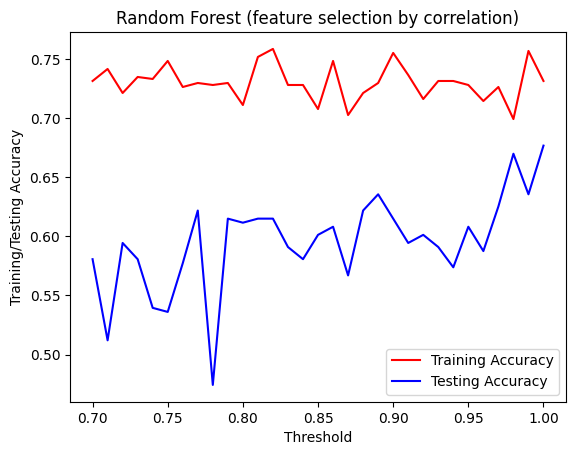

In [107]:
threshold_lst = [i for i in np.arange(0.7,1,0.01)]
plt.plot(threshold_lst, train_accu_lst, c="red", label="Training Accuracy")
plt.plot(threshold_lst,test_accu_lst, c="blue", label="Testing Accuracy")
plt.xlabel('Threshold')
plt.ylabel('Training/Testing Accuracy')
plt.title("Random Forest (feature selection by correlation)")
plt.legend()
plt.show()

Best result: When threshold is: 0.9800, Training accuray is: 0.737, Testing accuracy is: 0.667

In [111]:
best_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.98)]
new_X = X.drop(best_to_drop, axis=1)
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.33, random_state=42)
rf_best = RandomForestClassifier(n_estimators=80, min_samples_leaf=2, max_depth=4, criterion="gini", max_features="sqrt")
rf_best.fit(new_X_train, y_train)
y_pred = rf_best.predict(new_X_test)

In [112]:
new_feature_scores = pd.Series(rf_best.feature_importances_, index=new_X_train.columns).sort_values(ascending=False)  #after select features by correlation
display(new_feature_scores)

rmseP_std       0.070703
rmseP_a         0.065266
melspect_std    0.064189
mfcc_a_0        0.054464
melspect_a      0.051518
                  ...   
beats_std       0.000514
chroma_a_3      0.000367
chroma_a_5      0.000068
chroma_std_9    0.000000
tonnetz_a       0.000000
Length: 78, dtype: float64

In [113]:
test_accu_lst = []
for threshold in np.arange(0.0065, 0.025, 0.0005):
  drop_features = new_feature_scores[new_feature_scores<threshold].index.tolist()
  X_drop = new_X.drop(drop_features, axis=1)
  X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.33, random_state=42)
  rf_best_drop = RandomForestClassifier(n_estimators=80, min_samples_leaf=2, max_depth=4, criterion="gini", max_features="sqrt")
  rf_best_drop.fit(X_train_drop, y_train)
  y_pred_drop = rf_best_drop.predict(X_test_drop)
  test_accu = accuracy_score(y_test, y_pred_drop)
  test_accu_lst.append(test_accu)

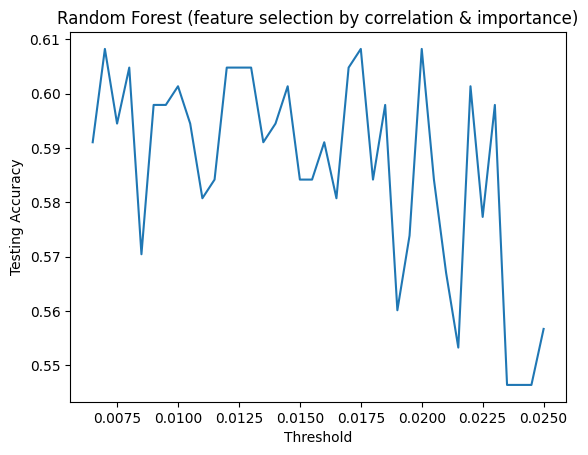

In [115]:
threshold_lst = [i for i in np.arange(0.0065, 0.025, 0.0005)]
plt.plot(threshold_lst,test_accu_lst)
plt.xlabel('Threshold')
plt.ylabel('Testing Accuracy')
plt.title("Random Forest (feature selection by correlation & importance)")
plt.show()

No significant improvement

Tune hyperparameter

In [116]:
rf_new = RandomForestClassifier(criterion = "gini",max_features = "sqrt")
params_rf = {'n_estimators': [25,50,100,150,200],
        'max_depth':[4,5,6,7,8,9,10],
        'min_samples_leaf':[1,2,3,4,5]}
grid_rf = GridSearchCV(estimator = rf_new,
             param_grid = params_rf,
             scoring = 'accuracy',
             cv = 5,
             n_jobs = -1)
grid_rf.fit(new_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='accuracy')

In [117]:
best_model = grid_rf.best_estimator_
best_param = grid_rf.best_params_
print("best paramers of random forest: ", best_param)
print("best accuracy score of random forest is: {:.3f}".format(grid_rf.best_score_))

y_pred = best_model.predict(new_X_test)

# Compute test_accuracy
test_accu = accuracy_score(y_test, y_pred)

# Print test_roc_auc
print('Test set accuracy score for random forest: {:.3f}'.format(test_accu))

best paramers of random forest:  {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 150}
best accuracy score of random forest is: 0.694
Test set accuracy score for random forest: 0.632
